In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

pd.options.display.max_columns = 100
pd.options.display.max_rows = 500

from pandas.tseries.offsets import DateOffset
from scipy.stats import f_oneway
from scipy import stats

In [271]:
## Importando a base Consolidada
dividasMG = pd.read_csv(r'O:\OneDrive\ANDREIA\MATERIAL_ESTUDOS\PUC\TCC\Datasets\Consolidado2021.csv', sep=';', parse_dates=True, encoding='iso-8859-1')

In [272]:
dividasMG.head()

,PERIODO,CPF_CNPJ,TIPO_PESSOA,TIPO_DEVEDOR,NOME_DEVEDOR,UF_UNIDADE_RESPONSAVEL,UNIDADE_RESPONSAVEL,ENTIDADE_RESPONSAVEL,UNIDADE_INSCRICAO,NUMERO_INSCRICAO,TIPO_SITUACAO_INSCRICAO,SITUACAO_INSCRICAO,RECEITA_PRINCIPAL,DATA_INSCRICAO,INDICADOR_AJUIZADO,VALOR_CONSOLIDADO
0,01/01/2021,06.286.147/0001-76,Pessoa jurídica,Principal,ART BRINDES INDUSTRIA E COMERCIO EIRELI,MG,UBERABA,PGFN,UBERABA,CSMG201901085,Em cobrança,AJUIZADA,Contribuições LC110 (FGTS),05/06/2019,SIM,2291.91
1,01/01/2021,06.286.147/0001-76,Pessoa jurídica,Principal,ART BRINDES INDUSTRIA E COMERCIO EIRELI,MG,UBERABA,PGFN,UBERABA,FGMG202100105,Em cobrança,INSCRITA,Contribuições FGTS,03/02/2021,NAO,66986.07
2,01/01/2021,17.268.863/0001-47,Pessoa jurídica,Principal,JOAQUIM GERVASIO COUTINHO,MG,MINAS GERAIS,PGFN,MINAS GERAIS,FGBH000083351,Em cobrança,AJUIZADA,Contribuições FGTS,05/08/1983,SIM,6354.85
3,01/01/2021,19.376.161/0001-02,Pessoa jurídica,Principal,HMAXX INDUSTRIA E COMERCIO DE ALIMENTOS E ADOC...,MG,MINAS GERAIS,PGFN,MINAS GERAIS,FGMG201902652,Em cobrança,INSCRITA,Contribuições FGTS,05/11/2019,NAO,12820.18
4,01/01/2021,05.517.165/0001-59,Pessoa jurídica,Principal,ANDREA DA SILVA VIEIRA,MG,MINAS GERAIS,PGFN,MINAS GERAIS,FGMG201500294,Em cobrança,INSCRITA,Contribuições FGTS,04/02/2015,NAO,12053.58


In [215]:
df = dividasMG[['VALOR_CONSOLIDADO']]

In [216]:
agrupPeriodo.first()

,CPF_CNPJ,TIPO_PESSOA,TIPO_DEVEDOR,NOME_DEVEDOR,UF_UNIDADE_RESPONSAVEL,UNIDADE_RESPONSAVEL,ENTIDADE_RESPONSAVEL,UNIDADE_INSCRICAO,NUMERO_INSCRICAO,TIPO_SITUACAO_INSCRICAO,SITUACAO_INSCRICAO,RECEITA_PRINCIPAL,DATA_INSCRICAO,INDICADOR_AJUIZADO,VALOR_CONSOLIDADO
PERIODO,,,,,,,,,,,,,,,
01/01/2021,06.286.147/0001-76,Pessoa jurídica,Principal,ART BRINDES INDUSTRIA E COMERCIO EIRELI,MG,UBERABA,PGFN,UBERABA,CSMG201901085,Em cobrança,AJUIZADA,Contribuições LC110 (FGTS),05/06/2019,SIM,2291.91
01/04/2021,22.905.919/0001-67,Pessoa jurídica,Principal,FUJI LANCHES LTDA,MG,MINAS GERAIS,PGFN,MINAS GERAIS,FGMG201901143,Em cobrança,INSCRITA,Contribuições FGTS,06/06/2019,NAO,4088.31
01/07/2021,03.200.004/0001-01,Pessoa jurídica,Principal,CONDOMINIO ESPECIAL BAHIA SHOPPING,MG,MINAS GERAIS,PGFN,MINAS GERAIS,CSMG200700070,Em cobrança,INSCRITA,Contribuições LC110 (FGTS),11/04/2007,NAO,349.47
01/10/2021,05.667.429/0001-50,Pessoa jurídica,Principal,CEPAC CENTRAL PAULISTA DE COUROS LTDA,MG,MINAS GERAIS,PGFN,MINAS GERAIS,FGMG201701442,Em cobrança,AJUIZADA,Contribuições FGTS,24/04/2017,SIM,16480.88


In [236]:
## Definindo as variaveis a serem utilizadas
x = dividasMG['PERIODO'].value_counts().tolist()
y = pd.DatetimeIndex(dividasMG.groupby(['PERIODO']).groups.keys()).day
print(x)

[32728, 32244, 28181, 28022]


In [218]:
##Simplificando Dataframe com campos mais importantes para análise
data = { 'Periodo': y,
         'QtdePorPeriodo': x,
         'TotalPorPeriodo': totalPorPeriodo
       }

newDf = pd.DataFrame(data)
print(newDf)

   Periodo  QtdePorPeriodo  TotalPorPeriodo
0        1           32728     1.902615e+09
1        4           32244     2.028318e+09
2        7           28181     2.101908e+09
3       10           28022     2.115273e+09


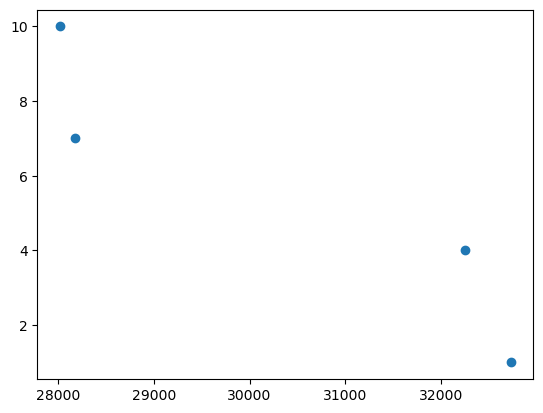

In [219]:
##Scatter Plot
plt.scatter(x, y)
plt.show()

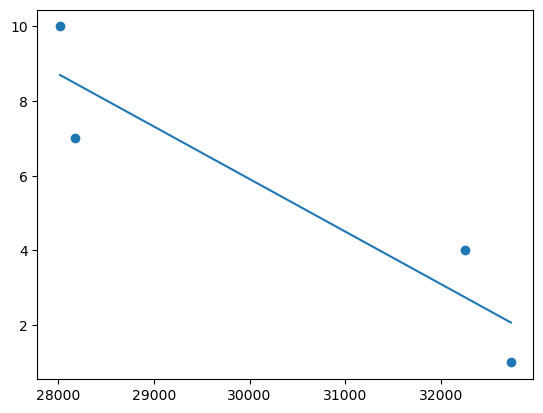

In [220]:
##Linear Regression
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [221]:
##Linear Regression - Prediction
##Quantidade de devedores por periodo em 5 anos
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

speed = myfunc(5)

print(speed)

48.18039394074245


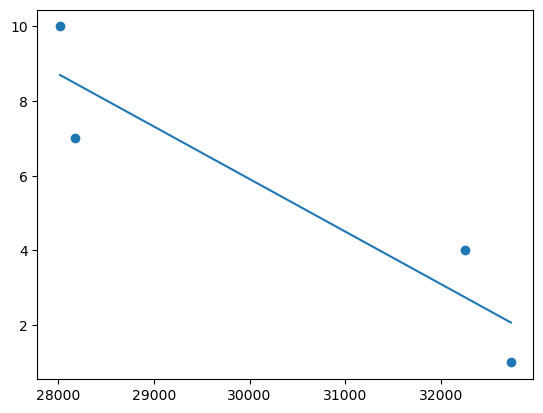

In [222]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [223]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

print(r)

-0.9241060008021352


In [224]:
##Multiple Regression
totalPorPeriodo = round(dividasMG.groupby(['PERIODO'])['VALOR_CONSOLIDADO'].agg('sum'), 2).tolist()

In [225]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [226]:
data_pred = 30;

df['Prediction'] = df[['VALOR_CONSOLIDADO']]

In [227]:
X = np.array(df.drop(['Prediction'], axis=1))
X = X[:-data_pred]

In [228]:
y = np.array(df['Prediction'])
y = y[:-data_pred]

In [229]:
##Teste de 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [230]:
x_pred = np.array(df.drop(['Prediction'], 1))[-data_pred: ]

In [231]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [232]:
teste_modelo = lr.score(X_test, y_test)
print(teste_modelo)

1.0


In [233]:
lr_pred = lr.predict(x_pred)

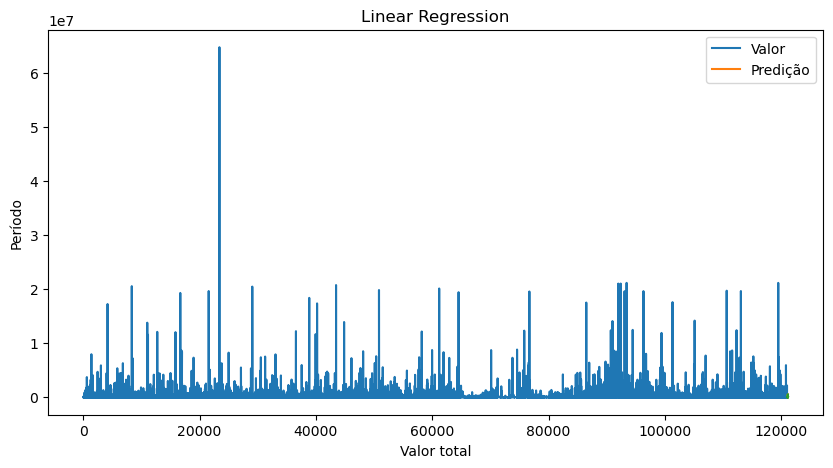

In [242]:
predictions = lr_pred

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(10,5))
plt.title('Linear Regression')
plt.xlabel('Valor total')
plt.ylabel('Período')
plt.plot(df['VALOR_CONSOLIDADO'][0:])
plt.plot(valid[['VALOR_CONSOLIDADO', 'Predictions']])
plt.legend(['Valor', 'Predição'])
plt.show()